This is the code that I will be adding to! Please feel free to fork/edit this : )

### Importing modules

In [20]:
import os
import glob
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wave
from keras.preprocessing import image
from PIL import Image

%matplotlib inline


### Setting file locations

In [22]:
DATA_DIR = 'C:/Users/Farrell Joswara/Documents/GitHub/AI/data'  # Replace with your dataset path
REAL_DIR = os.path.join(DATA_DIR, 'real')
FAKE_DIR = os.path.join(DATA_DIR, 'fake')


### Defining Functions

In [17]:
def create_spectrogram(audio_file, image_file): 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    if y.size == 0:
        raise ValueError
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    

    log_ms = (log_ms-np.min(log_ms))/(np.max(log_ms)-np.min(log_ms)) #normalizes by taking the lowest value and then sets that to zero, then divides the whole thing by the highest value to get a scale from 0 to 1
    librosa.display.specshow(log_ms, sr=sr, cmap='gray')

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path): #ensure that you set the input path to the folder where the wav files are, and then the output directory will create a folder if one isn't already there and input the images there
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

C:\Users\Farrell Joswara\AppData\Local\Temp\ipykernel_21328\905081512.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
c:\Users\Farrell Joswara\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


EOFError: 

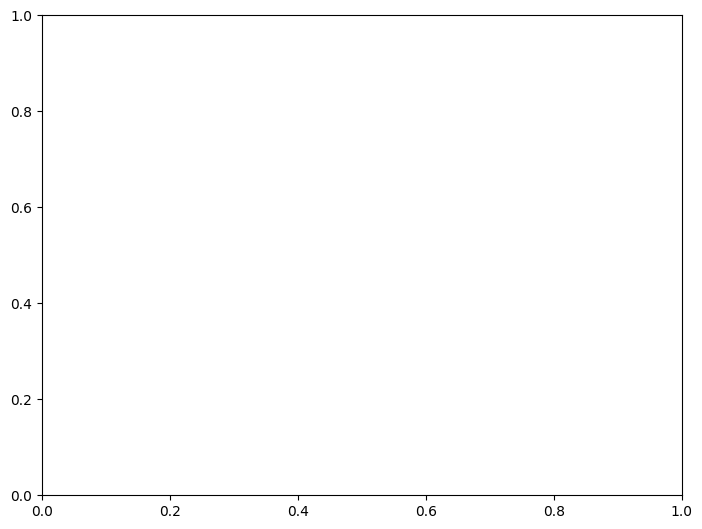

In [25]:
create_pngs_from_wavs(REAL_DIR, 'Spectrograms/real')


# Prearing the dataset

In [114]:
real_files = (os.listdir('Spectrograms/real'))
fake_files= (os.listdir('Spectrograms/fake'))

minimum_samples = min(len(real_files),len(fake_files))
np.random.seed(1)


all_files = np.concatenate((np.array(real_files),np.random.choice(fake_files,minimum_samples,replace=False)))
print(len(all_files))







43462


In [115]:
values = ([1]*len(real_files))
values = values + ([0]*len(real_files))

print(len(values),len(all_files))

data = {
    "files":all_files,
    "value":values
}
df = pd.DataFrame(data)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

'''

1 = real
0 = fake 

'''

43462 43462


'\n\n1 = real\n0 = fake \n\n'

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)


In [113]:
batch_size = 16
nb_classes =4
nb_epochs = 5
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

c:\Users\Farrell Joswara\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(None, 1), dtype=float32). Expected shape (None, 200, 200, 3), but input has incompatible shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=string)
  • training=True
  • mask=None